In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.expand_frame_repr', True)

df = pd.read_csv('dataset/diabetes_prediction_dataset.csv')

print('Columns name: ', list(df.columns), '\nN. Rows: ', df.size)
df.describe()

Columns name:  ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'] 
N. Rows:  900000


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [20]:
#Notiamo che il dataset non presenta valori nulli.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [21]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


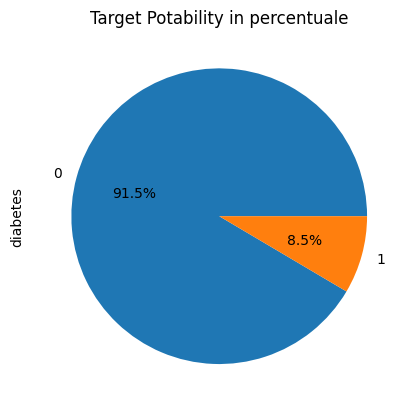

In [22]:
df['age'] = df['age'].astype(int)

colors = sns.color_palette('pastel')[0:2]
(df['diabetes'].value_counts() / len(df) * 100).plot.pie(autopct='%.1f%%')
plt.title("Target Potability in percentuale")
plt.show()
#Il Mio dataset è estremamente bilianciato, sarà necessario
#utilizzare qualche tecnica per bilanciarlo.

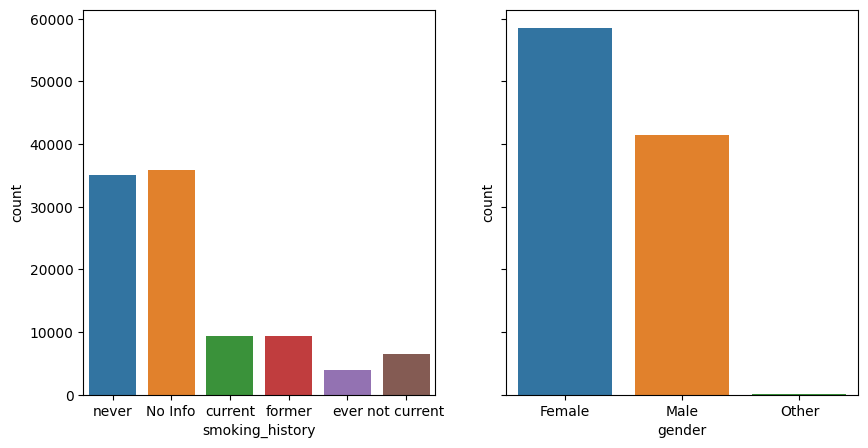

In [23]:
df.head(10)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.countplot(df, x='smoking_history', ax=ax1)
sns.countplot(df, x='gender', ax=ax2)
plt.show()


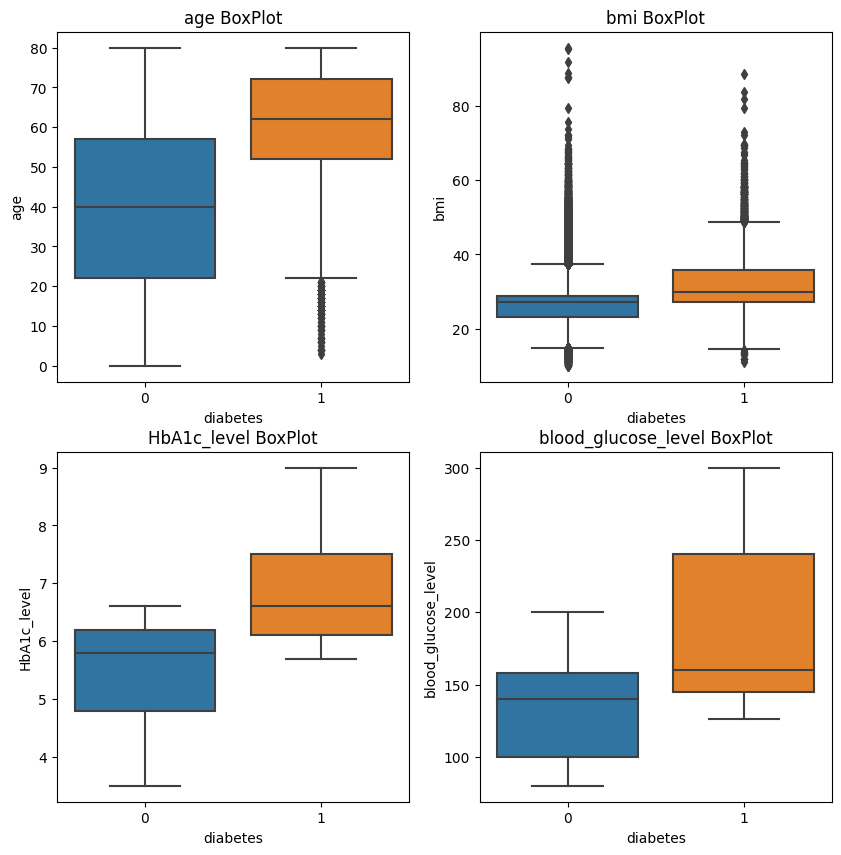

In [24]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
sns.boxplot(df, x='diabetes', y='age', ax=axs[0][0]).set(title='age BoxPlot')
sns.boxplot(df, x='diabetes', y='bmi', ax=axs[0][1]).set(title='bmi BoxPlot')
sns.boxplot(df, x='diabetes', y='HbA1c_level', ax=axs[1][0]).set(title='HbA1c_level BoxPlot')
sns.boxplot(df, x='diabetes', y='blood_glucose_level', ax=axs[1][1]).set(title='blood_glucose_level BoxPlot')
plt.show()

#age	hypertension	heart_disease	smoking_history	bmi	HbA1c_level	blood_glucose_leve

C:\Users\aless\AppData\Local\Temp\ipykernel_5552\3679242959.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


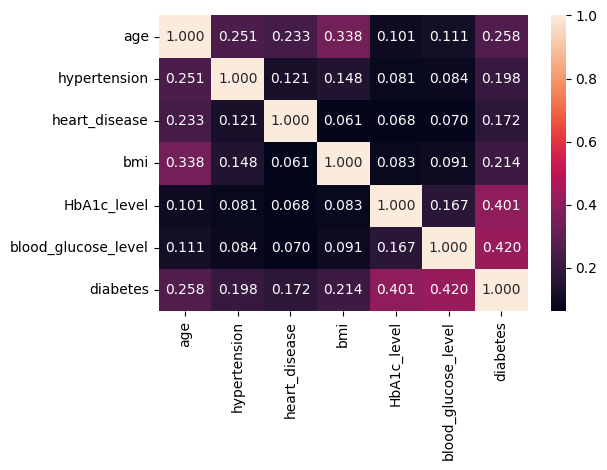

In [25]:
corr_matrix = df.corr()
sns.heatmap(data=corr_matrix, annot=True, fmt=".3f")
plt.tight_layout()

In [26]:
df['gender_label'] = df['gender'].map({
    'Female': 0,
    'Male'  : 1,
    'Other' : 2})
df['smoking_label'] = df['smoking_history'].map(dict(zip(pd.Series(df['smoking_history'].unique()), pd.Series([i for i in range(6)]))))

df_s = df.drop(['gender', 'smoking_history'], axis=1)



from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'minority')

X_sm , y_sm = smote.fit_resample(df_s.drop(['diabetes'], axis =1), df_s['diabetes'])

y_sm.value_counts() 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    X_sm ,y_sm,
    random_state=23, 
    test_size=0.33, 
    stratify= y_sm
)

In [27]:
X_train.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_label,smoking_label
163176,42,0,0,31.350738,6.285263,300,0,0
181619,53,0,0,28.329671,8.034895,155,1,3
115049,74,0,0,28.716158,6.127525,159,1,0
144020,44,0,0,30.331422,6.390203,145,1,1
176869,54,0,0,35.293552,5.924846,155,1,0
50433,50,0,0,33.080000,6.600000,90,1,2
59440,49,0,0,26.530000,6.100000,159,1,4
67469,37,0,0,25.680000,4.000000,158,0,0
82389,2,0,0,17.690000,4.800000,130,1,1
171589,64,0,0,26.315032,5.954698,260,1,2


In [28]:
#Vado a salvare train e test in un csv apposito
X_train['diabetes'] = y_train
X_test['diabetes'] = y_test
X_train.to_csv("train.csv", index=False)
X_test.to_csv("test.csv", index=False)

X_train.columns
X_train = X_train.drop('diabetes', axis=1)
X_test = X_test.drop('diabetes', axis=1)